In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from Datos.Datos import Datos
from Estrategias.Particion import Particion
from Estrategias.EstrategiaParticionado import EstrategiaParticionado
from Estrategias.ValidacionSimple import ValidacionSimple
from Estrategias.ValidacionCruzada import ValidacionCruzada
from Estrategias.ValidacionBootstrap import ValidacionBootstrap
from Clasificadores.Clasificador import Clasificador
from Clasificadores.ClasificadorNaiveBayes import ClasificadorNaiveBayes
from Clasificadores.ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Clasificadores.ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from Clasificadores.ClasificadorAG import ClasificadorAG
from Clases_AG.Individuo import Individuo
# from Clases_AG.IntervalosClase import IntervalosClase
from Clases_AG.IntervalosDataSet import IntervalosDataSet
from Clases_AG.Regla_binaria import Regla_binaria
from Clases_AG.Regla_numerica import Regla_numerica
from Clases_AG.Regla import Regla
import numpy as np


# Apartado 1

### 1.A - Generacion de población inicial

La población inicial la generamos tantos individuos como tamaño de población inicial. Cada individuo recibe un número máximo de reglas, y genera un número de reglas entre 1 y el máximo.

### 1.B - Mecanismo de cruce

En primer lugar, hemos considerado suficiente implentar sólo el mecanismo de cruce de reglas entre distintos individuos, dado que implementar cruce interregla sería un coste y complejidad añadadidos muy alto. 

El algoritmo de cruce que hemos implementado es el siguiente:

Para cada par de progenitores, si le número de reglas es 1, los añadimos directamente a la lista de descendencia, dado que cruzarles no serviría de nada. 

Por último, si tienen varias reglas cada uno y se acierta la probabilidad de cruce, entonces se calcula un punto de corte como un número aleatorio entre 1 y el mínimo del número de reglas de cada individuo, hacemos el corte tal que así:

    vastago1.reglas,vastago2.reglas = p1.reglas[:corte]+p2.reglas[corte:],p1.reglas[corte:]+p2.reglas[:corte]
    
y añadimos los vástagos a la lista de descendientes.

### 1.C - Mecanismo de mutación

Nuestro AG comprueba para cada regla de cada individuo si muta o no en base a el tipo de regla que sea:

- Si es numérica, se calcula un random() para cada condición y si acierta la probabilidad de mutación, se recalcula un número aleatorio entre 0 y el número de intervalos posibles.

- Si es binaria, recorre cada bit de cada condición y si acierta la probabilidad de mutación hace un bit-flip 

In [11]:
poblacion = [100,200]
generaciones = [100,200]
Reglas = [Regla_numerica,Regla_binaria]
num_max_reglas = 12
pr_cruce = 0.3
pr_mutacion = 0.1
estrategia = ValidacionCruzada(10)
medias = []
mejores = []
datos = Datos('ConjuntosDatos/example1.data')
estrategia.creaParticiones(datos=datos.datos,seed=None)

for (p,g) in zip(poblacion,generaciones):
    for r in Reglas:
        algoritmo = ClasificadorAG(tampoblacion=p,numgeneraciones=g,maxreglas=num_max_reglas,
                                   dataset=datos,probCruce=pr_cruce,probMutacion=pr_mutacion,tipoRegla=r)
        
        algoritmo.entrenamiento(datos.extraeDatos(estrategia.particiones[0].indicesTrain))
    
        prediccion = algoritmo.clasifica(datostest=datos.extraeDatos(estrategia.particiones[0].indicesTest))

        error = algoritmo.error(datos.extraeDatos(estrategia.particiones[0].indicesTest),prediccion);

        print('Error final al clasificar: ',np.around(error,3))
        
        medias.append(np.around(np.array(algoritmo.mediaFitnesPoblacion),3))

        mejores.append(np.around(np.array(algoritmo.mejoresFitness),3))

        

Generacion:  0 
	Best fitness:  0.508
Generacion:  1 
	Best fitness:  0.511
Generacion:  2 
	Best fitness:  0.575
Generacion:  3 
	Best fitness:  0.575
Generacion:  4 
	Best fitness:  0.575
Generacion:  5 
	Best fitness:  0.575
Generacion:  6 
	Best fitness:  0.575
Generacion:  7 
	Best fitness:  0.575
Generacion:  8 
	Best fitness:  0.575
Generacion:  9 
	Best fitness:  0.575
Generacion:  10 
	Best fitness:  0.575
Generacion:  11 
	Best fitness:  0.575
Generacion:  12 
	Best fitness:  0.575
Generacion:  13 
	Best fitness:  0.575
Generacion:  14 
	Best fitness:  0.575
Generacion:  15 
	Best fitness:  0.575
Generacion:  16 
	Best fitness:  0.575
Generacion:  17 
	Best fitness:  0.578
Generacion:  18 
	Best fitness:  0.578
Generacion:  19 
	Best fitness:  0.578
Generacion:  20 
	Best fitness:  0.578
Generacion:  21 
	Best fitness:  0.578
Generacion:  22 
	Best fitness:  0.578
Generacion:  23 
	Best fitness:  0.578
Generacion:  24 
	Best fitness:  0.578
Generacion:  25 
	Best fitness:  0.

Generacion:  6 
	Best fitness:  0.544
Generacion:  7 
	Best fitness:  0.544
Generacion:  8 
	Best fitness:  0.544
Generacion:  9 
	Best fitness:  0.544
Generacion:  10 
	Best fitness:  0.544
Generacion:  11 
	Best fitness:  0.544
Generacion:  12 
	Best fitness:  0.544
Generacion:  13 
	Best fitness:  0.558
Generacion:  14 
	Best fitness:  0.558
Generacion:  15 
	Best fitness:  0.558
Generacion:  16 
	Best fitness:  0.558
Generacion:  17 
	Best fitness:  0.558
Generacion:  18 
	Best fitness:  0.558
Generacion:  19 
	Best fitness:  0.558
Generacion:  20 
	Best fitness:  0.558
Generacion:  21 
	Best fitness:  0.558
Generacion:  22 
	Best fitness:  0.558
Generacion:  23 
	Best fitness:  0.558
Generacion:  24 
	Best fitness:  0.558
Generacion:  25 
	Best fitness:  0.567
Generacion:  26 
	Best fitness:  0.567
Generacion:  27 
	Best fitness:  0.567
Generacion:  28 
	Best fitness:  0.567
Generacion:  29 
	Best fitness:  0.567
Generacion:  30 
	Best fitness:  0.567
Generacion:  31 
	Best fitnes

Generacion:  11 
	Best fitness:  0.625
Generacion:  12 
	Best fitness:  0.631
Generacion:  13 
	Best fitness:  0.647
Generacion:  14 
	Best fitness:  0.656
Generacion:  15 
	Best fitness:  0.681
Generacion:  16 
	Best fitness:  0.681
Generacion:  17 
	Best fitness:  0.681
Generacion:  18 
	Best fitness:  0.708
Generacion:  19 
	Best fitness:  0.711
Generacion:  20 
	Best fitness:  0.711
Generacion:  21 
	Best fitness:  0.711
Generacion:  22 
	Best fitness:  0.711
Generacion:  23 
	Best fitness:  0.711
Generacion:  24 
	Best fitness:  0.711
Generacion:  25 
	Best fitness:  0.733
Generacion:  26 
	Best fitness:  0.733
Generacion:  27 
	Best fitness:  0.733
Generacion:  28 
	Best fitness:  0.733
Generacion:  29 
	Best fitness:  0.733
Generacion:  30 
	Best fitness:  0.733
Generacion:  31 
	Best fitness:  0.733
Generacion:  32 
	Best fitness:  0.75
Generacion:  33 
	Best fitness:  0.761
Generacion:  34 
	Best fitness:  0.761
Generacion:  35 
	Best fitness:  0.761
Generacion:  36 
	Best fit

In [4]:
print('Medias: ')
for media in medias:
    print(np.around(media,3),'\n')

print('\nMejores: ') 
for mejor in mejores:
    print(np.around(mejor,3),'\n')

Medias: 


NameError: name 'medias' is not defined

In [19]:
medias_100_1 = [ 0.487,  0.494 , 0.501 , 0.504 , 0.508,  0.508 , 0.506 , 0.509 , 0.506 , 0.51,
  0.511 , 0.506,  0.51  , 0.512  ,0.511 , 0.509 , 0.505  ,0.509  ,0.502  ,0.508,
  0.509  ,0.509,  0.504 , 0.508 , 0.513 , 0.509 , 0.505 , 0.506 , 0.508  ,0.506,
  0.506 , 0.507  ,0.508 , 0.512 , 0.516 , 0.516 , 0.518  ,0.515 , 0.511,  0.507,
  0.506,  0.508 , 0.508 , 0.512 , 0.518  ,0.524,  0.523  ,0.518 , 0.517 , 0.512,
  0.516 , 0.516 , 0.516 , 0.514,  0.521  ,0.52  , 0.524,  0.53 ,  0.529  ,0.535,
  0.537 , 0.528,  0.54,   0.546 , 0.539 , 0.526,  0.544 , 0.53 ,  0.535 , 0.538,
  0.55  , 0.57  , 0.565 , 0.561 , 0.559  ,0.551 , 0.556 , 0.562  ,0.562  ,0.55 ,  0.55,
  0.533 , 0.548 , 0.563 , 0.561 , 0.569 , 0.55 ,  0.545,  0.543  ,0.549 , 0.559,
  0.566 , 0.559 , 0.553 , 0.548,  0.552,  0.546 , 0.545 , 0.558,  0.561,  0.558]

mejores_100_1 = [ 0.508 , 0.511  ,0.575 , 0.575  ,0.575 , 0.575 , 0.575 , 0.575,  0.575,  0.575,
  0.575 , 0.575,  0.575,  0.575 , 0.575,  0.575,  0.575,  0.578 , 0.578,  0.578,
  0.578 , 0.578,  0.578 , 0.578 , 0.578,  0.578,  0.578,  0.578 , 0.578 , 0.578,
  0.578 , 0.578,  0.578 , 0.578 , 0.578,  0.6  ,  0.6  ,  0.6   , 0.6  ,  0.6    ,0.6,
  0.6   , 0.6  ,  0.6   , 0.6   , 0.6  ,  0.6  ,  0.6  ,  0.6   , 0.6  ,  0.6   , 0.6,
  0.636 , 0.636,  0.636 , 0.636 , 0.636,  0.636,  0.636,  0.636 , 0.636 , 0.636,
  0.636 , 0.636,  0.636 , 0.636 , 0.636,  0.636,  0.636,  0.636 , 0.636 , 0.636,
  0.636 , 0.636,  0.636 , 0.636 , 0.636,  0.636,  0.636,  0.636 , 0.636 , 0.636,
  0.636 , 0.636,  0.636 , 0.636 , 0.636,  0.636,  0.636,  0.636 , 0.636 , 0.636,
  0.636 , 0.636,  0.636 , 0.636,  0.636,  0.636,  0.636,  0.636 , 0.636]

medias_200_1 = [ 0.228,  0.313  ,0.352 , 0.389  ,0.402 , 0.412 , 0.436,  0.448 , 0.459 , 0.476,
  0.479 , 0.5,    0.507 , 0.514 , 0.523 , 0.521  ,0.517 , 0.523,  0.528 , 0.53,
  0.546 , 0.552 , 0.559,  0.569 , 0.574 , 0.58 ,  0.598 , 0.594  ,0.598 , 0.61,
  0.617 , 0.607 , 0.597,  0.596 , 0.601 , 0.598,  0.598  ,0.598 , 0.609 , 0.615,
  0.62  , 0.641 , 0.64 ,  0.642  ,0.643 , 0.635  ,0.653 , 0.665  ,0.662 , 0.659,
  0.661,  0.66 ,  0.666,  0.668  ,0.668 , 0.67,   0.671  ,0.676,  0.674  ,0.675,
  0.669,  0.666 , 0.675,  0.663  ,0.674 , 0.682,  0.688  ,0.691 , 0.69   ,0.696,
  0.701  ,0.699 , 0.7   , 0.709  ,0.701  ,0.698 , 0.697  ,0.703 , 0.693  ,0.706,
  0.704  ,0.705 , 0.709 , 0.695  ,0.704,  0.701 , 0.709  ,0.711 , 0.713  ,0.724,
  0.721 , 0.729 , 0.728 , 0.724  ,0.717 , 0.71  , 0.714  ,0.713 , 0.718  ,0.713,
  0.717 , 0.724 , 0.719 , 0.711  ,0.711,  0.709 , 0.712  ,0.71  , 0.717  ,0.712,
  0.703 , 0.712 , 0.715 , 0.714  ,0.71,   0.71  , 0.717  ,0.707 , 0.703  ,0.687,
  0.688 , 0.694,  0.692 , 0.702  ,0.691,  0.693 , 0.698  ,0.695 , 0.697  ,0.692,
  0.698 , 0.702,  0.7 ,   0.693 , 0.69,   0.689 , 0.691 , 0.705 , 0.699  ,0.702,
  0.702 , 0.703 , 0.7 ,   0.684 , 0.69 ,  0.702 , 0.714 , 0.706 , 0.703  ,0.701,
  0.694 , 0.696 , 0.693 , 0.7  ,  0.702,  0.699 , 0.691 , 0.691 , 0.703  ,0.715,
  0.713 , 0.707,  0.703 , 0.694 , 0.706,  0.701 , 0.692 , 0.692 , 0.692  ,0.692,
  0.703 , 0.712 , 0.713 , 0.709 , 0.708,  0.711 , 0.702 , 0.695 , 0.693  ,0.698,
  0.703 , 0.701  ,0.696 , 0.691 , 0.693 , 0.683 , 0.682 , 0.689 , 0.693 , 0.692,
  0.697 , 0.698 , 0.697 , 0.705,  0.71 ,  0.707 , 0.697,  0.694 , 0.695,  0.699,
  0.694]

mejores_200_1 = [ 0.547,  0.547 , 0.547 , 0.589 , 0.589  ,0.6   , 0.6  ,  0.6   , 0.603 , 0.625,
  0.625,  0.625 , 0.631,  0.647,  0.656 , 0.681 , 0.681 , 0.681  ,0.708  ,0.711,
  0.711,  0.711 , 0.711,  0.711,  0.711,  0.733,  0.733,  0.733 , 0.733 , 0.733,
  0.733,  0.733 , 0.75 ,  0.761 , 0.761,  0.761,  0.761,  0.789 , 0.789 , 0.789,
  0.789,  0.789 , 0.789,  0.789 , 0.789,  0.789,  0.789,  0.789 , 0.789 , 0.789,
  0.789,  0.789 , 0.789,  0.789 , 0.789,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792,  0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792,  0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792,  0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792 , 0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792,  0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792,  0.792 , 0.792,  0.792,  0.792,  0.792,  0.792,  0.792 , 0.792 , 0.792,
  0.792]

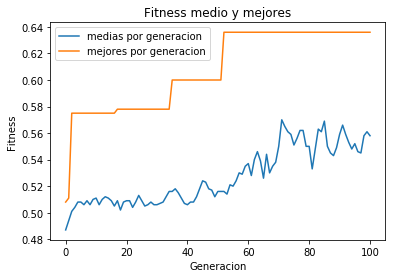

In [26]:
plt.xlabel('Generacion')
plt.ylabel('Fitness')
plt.title('Fitness medio y mejores')

_= plt.plot(medias_100_1,label='medias por generacion')
_= plt.plot(mejores_100_1 ,label='mejores por generacion')
_= plt.legend(loc='upper left')

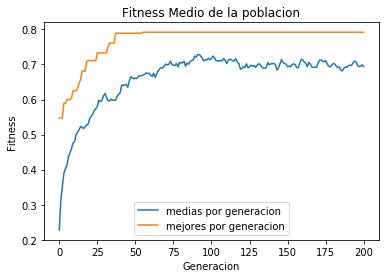

In [25]:
plt.xlabel('Generacion')
plt.ylabel('Fitness')
plt.title('Fitness Medio de la poblacion')

_= plt.plot(medias_200_1,label='medias por generacion')
_= plt.plot(mejores_200_1,label='mejores por generacion')
_= plt.legend(loc='lower center')

In [20]:
poblacion = [100,200]
generaciones = [100,200]
Reglas = [Regla_numerica,Regla_binaria]
num_max_reglas = 12
pr_cruce = 0.3
pr_mutacion = 0.1
estrategia = ValidacionCruzada(10)
medias_4 = []
mejores_4 = []
datos = Datos('ConjuntosDatos/example4.data')
estrategia.creaParticiones(datos=datos.datos,seed=None)

for (p,g) in zip(poblacion,generaciones):
    for r in Reglas:
        algoritmo = ClasificadorAG(tampoblacion=p,numgeneraciones=g,maxreglas=num_max_reglas,
                                   dataset=datos,probCruce=pr_cruce,probMutacion=pr_mutacion,tipoRegla=r)
        
        algoritmo.entrenamiento(datos.extraeDatos(estrategia.particiones[0].indicesTrain))
    
        prediccion = algoritmo.clasifica(datostest=datos.extraeDatos(estrategia.particiones[0].indicesTest))

        error = algoritmo.error(datos.extraeDatos(estrategia.particiones[0].indicesTest),prediccion);

        print('Error final al clasificar: ',np.around(error,3))
        
        medias_4.append(np.around(np.array(algoritmo.mediaFitnesPoblacion),3))

        mejores_4.append(np.around(np.array(algoritmo.mejoresFitness),3))


Fitness superior a 0.95, 0.989
Fitness Ario:  0.989
Error final al clasificar:  0.8
Generacion:  0 
	Best fitness:  0.778
Generacion:  1 
	Best fitness:  0.778
Generacion:  2 
	Best fitness:  0.778
Generacion:  3 
	Best fitness:  0.778
Generacion:  4 
	Best fitness:  0.9
Generacion:  5 
	Best fitness:  0.9
Generacion:  6 
	Best fitness:  0.9
Generacion:  7 
	Best fitness:  0.9
Fitness superior a 0.95, 0.956
Fitness Ario:  0.956
Error final al clasificar:  0.6
Fitness superior a 0.95, 1.0
Fitness Ario:  1.0
Error final al clasificar:  0.8
Generacion:  0 
	Best fitness:  0.611
Generacion:  1 
	Best fitness:  0.667
Generacion:  2 
	Best fitness:  0.833
Generacion:  3 
	Best fitness:  0.833
Generacion:  4 
	Best fitness:  0.856
Generacion:  5 
	Best fitness:  0.856
Generacion:  6 
	Best fitness:  0.856
Generacion:  7 
	Best fitness:  0.9
Generacion:  8 
	Best fitness:  0.9
Generacion:  9 
	Best fitness:  0.933
Fitness superior a 0.95, 0.989
Fitness Ario:  0.989
Error final al clasificar:  

In [21]:
print('Medias: ')
for media in medias_4:
    print(np.around(media,3),'\n')

print('\nMejores: ') 
for mejor in mejores_4:
    print(np.around(mejor,3),'\n')

Medias: 
[ 0.489] 

[ 0.182  0.381  0.508  0.549  0.571  0.615  0.63   0.646  0.691] 

[ 0.491] 

[ 0.181  0.356  0.419  0.48   0.542  0.583  0.599  0.626  0.668  0.685
  0.724] 


Mejores: 
[ 0.989] 

[ 0.778  0.778  0.778  0.778  0.9    0.9    0.9    0.9    0.956] 

[ 1.] 

[ 0.611  0.667  0.833  0.833  0.856  0.856  0.856  0.9    0.9    0.933
  0.989] 



In [ ]:
poblacion = [100,200]
generaciones = [100,200]
Reglas = [Regla_numerica,Regla_binaria]
num_max_reglas = 12
pr_cruce = 0.3
pr_mutacion = 0.1
estrategia = ValidacionCruzada(10)
medias_wdbc = []
mejores_wdbc = []
datos = Datos('ConjuntosDatos/wdbc.data')
estrategia.creaParticiones(datos=datos.datos,seed=None)

for (p,g) in zip(poblacion,generaciones):
    for r in Reglas:
        algoritmo = ClasificadorAG(tampoblacion=p,numgeneraciones=g,maxreglas=num_max_reglas,
                                   dataset=datos,probCruce=pr_cruce,probMutacion=pr_mutacion,tipoRegla=r)
        
        algoritmo.entrenamiento(datos.extraeDatos(estrategia.particiones[0].indicesTrain))
    
        prediccion = algoritmo.clasifica(datostest=datos.extraeDatos(estrategia.particiones[0].indicesTest))

        error = algoritmo.error(datos.extraeDatos(estrategia.particiones[0].indicesTest),prediccion);

        print('Error final al clasificar: ',np.around(error,3))
        
        medias_wdbc.append(np.around(np.array(algoritmo.mediaFitnesPoblacion),3))

        mejores_wdbc.append(np.around(np.array(algoritmo.mejoresFitness),3))

## WDBC data para 100,100 y 20 

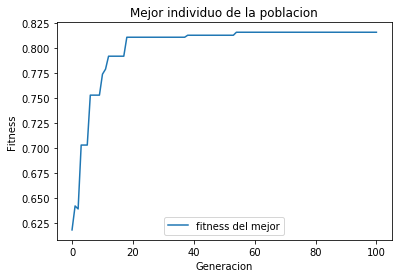

In [28]:
best_wdbc = [0.618, 0.642, 0.639, 0.703, 0.703, 0.703, 0.753, 0.753, 0.753, 0.753, 0.774, 0.779, 0.792, 0.792, 0.792, 0.792, 0.792, 0.792, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.811, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816, 0.816]

plt.xlabel('Generacion')
plt.ylabel('Fitness')
plt.title('Mejor individuo de la poblacion')

_= plt.plot(best_wdbc,label='fitness del mejor')
_= plt.legend(loc='lower center')

# Apartado 3 - Análisis de los resultados

### Importancia del número de reglas

Este es el atributo del AG que más añade complejidad. Tener un número alto de reglas hace que cada proceso de comprobación de fitness, entrenamiento y clasificación sea costoso y complejo. Y no sólo eso, nos dimos cuenta que para el dataset _wdbc_ un número alto de reglas dejaba el fitness siempre a 0. Esto es debido a que con muchas reglas, es muy fácil que una de las condiciones no se ajuste a los datos de entrenamiento e invalide esa regla. 

### Importancia del tamaño de población y generaciones

A pesar de que estos factores sean los que aumenten el coste del algoritmo en mayor medida, especialmente a grandes números, son los más decisivos. Una población muy alta de individuos puede llevar a tener datos repetidos.

En todas las gráficas anteriores los cambios más grandes se producían en las primeras generaciones, por lo que podemos observar que un número de generaciones adecuado a cada problema es necesario. Dicho número de generaciones no es siempre el mismo, dado que cada problema puede tardar más, o menos, en encontrar mejores soluciones en base a sus parámetros.

### Importancia de la tasa de cruce

Con una tasa de cruce mayor, la población sufre muchos cambios, pero con los elementos que ya tenía incorporados. 

### Importancia de la tasa de mutación

Con una tasa de mutación alta, cada individuo de la población tendría la posibilidad de acabar en uno completamente diferente, por lo que tendríamos generaciones con resultados que no podrían relacionarse, quitando el sentido del algoritmo genético en sí.

### Importancia de la representación en las reglas

Nos hemos dado cuenta de que el mayor impacto en la representación de las reglas se daba en las primeras generaciones. Para los número naturales, el fitness inicial ronda el 0.5, o incluso menos. Sin embargo, la representación binaria presenta una clara ventaja, y es la posibilidad de condiciones _or_ en las reglas, produciendo más aciertos y empezando con poblaciones de fitness medio de 0.7.

Normalmente las poblaciones con números naturales eran más propensas a estancarse y no avanzar, mientras que las binarias mejoraban constantemente. Creemos que las binarias son menos propensas a estancarse en parte por la mutación, dado que pasa de tener un número a un array de, por ejemplo, 10 bits, dando más margen a la mutación de crear reglas decisivas en el algoritmo.
